In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Note: The original CSV that I used is too large to upload to GitHub. Thus, I uploaded the cleaned version that I produce below. The initial loading/cleaning is irrelvant. There is another Markdown where the plotting begins and the cleaned DF can be used.

In [29]:
anes = pd.read_csv('/Users/eleanorbeers/Desktop/anes_timeseries_cdf_csv_20220916/anes_timeseries_cdf_csv_20220916.csv', na_values = ' ')

/var/folders/bk/ktq9bhyd5sj0sjnh3gds09940000gn/T/ipykernel_6730/2505955600.py:1: DtypeWarning: Columns (642,644) have mixed types. Specify dtype option on import or set low_memory=False.
  anes = pd.read_csv('/Users/eleanorbeers/Desktop/anes_timeseries_cdf_csv_20220916/anes_timeseries_cdf_csv_20220916.csv', na_values = ' ')


In [30]:
anes.head()

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,...,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
0,ANES_CDF_VERSION:2022-Sep-16,1948,1001,19481001,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANES_CDF_VERSION:2022-Sep-16,1948,1002,19481002,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANES_CDF_VERSION:2022-Sep-16,1948,1003,19481003,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANES_CDF_VERSION:2022-Sep-16,1948,1004,19481004,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANES_CDF_VERSION:2022-Sep-16,1948,1005,19481005,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
anes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Columns: 1030 entries, Version to VCF9282
dtypes: float64(1016), int64(11), object(3)
memory usage: 536.1+ MB


In [32]:
# Reconnect to GitHub

%pip install gitpython
%pip install gitpython

import git
repo = git.Repo(search_parent_directories=True)
config = repo.config_writer()
config.set_value("user", "name", "eleanorbeers")
config.set_value("user", "email", "eleanor.d.beers@vanderbilt.edu")
config.release()


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [33]:
# EDA of variables of interest
print(anes['VCF0232'].dtype)
print(anes['VCF0846'].dtype)


float64
float64


In [34]:
# More EDA of variables
df = anes[['VCF0004','VCF0232', 'VCF0846', 'VCF0302']]
df.head()
df.dtypes

VCF0004      int64
VCF0232    float64
VCF0846    float64
VCF0302    float64
dtype: object

In [35]:
# Renaming columns for clarity
df = df.rename(columns={'VCF0004': 'year', 'VCF0232': 'ft_lgbt', 'VCF0846': 'religion', 'VCF0302': 'party_id'})

In [36]:
# Peeking at changes
df.head()

,year,ft_lgbt,religion,party_id
0,1948,NaN,NaN,NaN
1,1948,NaN,NaN,NaN
2,1948,NaN,NaN,NaN
3,1948,NaN,NaN,NaN
4,1948,NaN,NaN,NaN


In [82]:
# Data cleaning
df = df.dropna(subset=['ft_lgbt', 'religion', 'party_id'])

In [40]:
# Cleaning religion column, dropping all rows w 8 and 0 per codebook
df = df[(df['religion'] != 0) & (df['religion'] != 8)]

In [41]:
# Cleaning lgbt column
# Need to code all 97 as 98.5 (97 represents all 97-100 values) - per codebook
# Need to drop all 98 and 99 rows

df['ft_lgbt'] = df['ft_lgbt'].replace(97, 98.5)
df = df[(df['ft_lgbt'] != 98) & (df['ft_lgbt'] != 99)]


In [42]:
# Cleaning party_id column
# Need to drop all 8 and 9 rows
df = df[(df['party_id'] != 8) & (df['party_id'] != 9)]

In [43]:
# Need to create text dummy for religion (keep religion numeric column for regression)
# 1 = 'Religious', 2 = 'Not Religious'
df['religion_cat'] = np.where(df['religion'] == 1, 'Religious', 'Not Religious')


In [44]:
# Need to create text dummy for party_id (keep religion numeric column for regression)
# 1 = 'Republican', 2 = 'Independent', 3 = 'No preference', 4 = 'Other', 5 = 'Democrat'
df['party_id_cat'] = np.where(df['party_id'] == 1, 'Republican', np.where(df['party_id'] == 2, 'Independent', np.where(df['party_id'] == 3, 'No preference', np.where(df['party_id'] == 4, 'Other', 'Democrat'))))

In [57]:
# Changing religion variable to be more intiuative
df['religion'] = df['religion'].replace(2, 0)
df.head()

array([1., 0.])

### Code can be run with GitHub CSV from this point on.

In [83]:
# Export cleaned data to csv (original csv is too large to push to GitHub) - For your reference, the cleaned csv is in the GitHub repo. Use this instead of the original csv that I loaded in.
df.to_csv('/Users/eleanorbeers/Desktop/anes_cleaned.csv')

# Change based on how you read data in
# df = pd.read_csv('/Users/eleanorbeers/Desktop/anes_cleaned.csv')

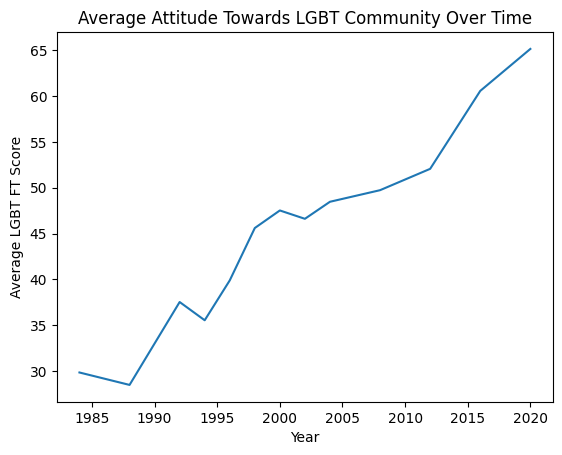

In [81]:
# Create another df
# Group by year
# Find average ft_lgbt per year
# Line graph (x = year, y = average ft_lgbt)

df2 = df.groupby('year')['ft_lgbt'].mean().reset_index()
df2.head()

df2.plot(x='year', y='ft_lgbt', kind='line', legend = False)

# Add titles and labels
plt.title('Average Attitude Towards LGBT Community Over Time')
plt.xlabel('Year')
plt.ylabel('Average LGBT FT Score') 

# Display the plot
plt.show()


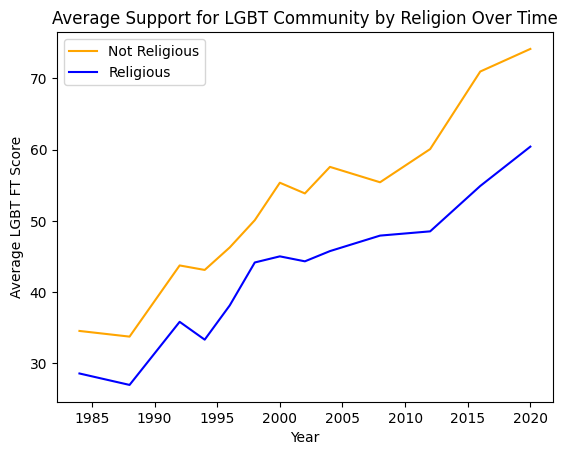

In [80]:
# Now we want to break it down by religion
# Plot w 2 lines (religious and not religious) - still with average ft_lgbt per year

# Define the colors for each category
colors = {'Religious': 'blue', 'Not Religious': 'orange'}

df3 = df.groupby(['year', 'religion_cat'])['ft_lgbt'].mean().reset_index()
df3.head()

sns.lineplot(x='year', y='ft_lgbt', hue='religion_cat', data=df3, palette=colors)

# Add titles and labels
plt.title('Average Support for LGBT Community by Religion Over Time')
plt.xlabel('Year')
plt.ylabel('Average LGBT FT Score') 

plt.legend(title = False)

# Display the plot
plt.show()

Text(0, 0.5, 'Percentage of Religious Respondents')

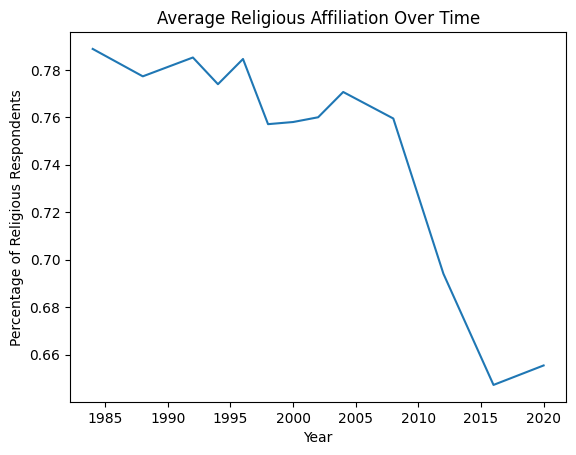

In [74]:
# Now lets look at the trend of religious affiliation over time
# Find average percentage of religious people per year
# Line graph (x = year, y = average percentage of religious people)

df4 = df.groupby('year')['religion'].mean().reset_index()
df4.head()
df4.plot(x='year', y='religion', kind='line', legend=False)

# Add titles and labels
plt.title('Average Religious Affiliation Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Religious Respondents') 

In [49]:
# Peeking at changes
df.head()

,year,ft_lgbt,religion,party_id,religion_cat,party_id_cat
27180,1984,50.0,1.0,1.0,Religious,Republican
27181,1984,40.0,1.0,2.0,Religious,Independent
27182,1984,0.0,1.0,5.0,Religious,Democrat
27183,1984,15.0,1.0,5.0,Religious,Democrat
27184,1984,0.0,1.0,2.0,Religious,Independent


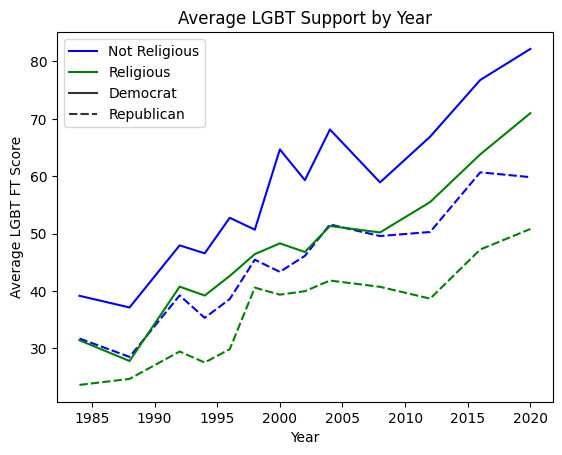

In [72]:
# Ok, now we can get even more specifc and look at religious dems, non-religious dems, religious republicans, non-religious republicans and average lgbt support by year
# Line graph (x = year, y = average ft_lgbt)
# 4 lines (religious dems, non-religious dems, religious republicans, non-religious republicans)

df5 = df.groupby(['year', 'religion_cat', 'party_id_cat'])['ft_lgbt'].mean().reset_index()
df5.head()

colors = {'Religious': '#008000', 'Not Religious': '#0000FF'}

# Filter for only democrats and republicans
df5 = df5[(df5['party_id_cat'] == 'Republican') | (df5['party_id_cat'] == 'Democrat')]
df5.head()

lineplot = sns.lineplot(
    x='year', 
    y='ft_lgbt', 
    hue='religion_cat', 
    style='party_id_cat', 
    data=df5, 
    palette=colors
)


# Add titles and labels
plt.title('Average LGBT Support by Year')
plt.xlabel('Year')
plt.ylabel('Average LGBT FT Score') 

handles, labels = lineplot.get_legend_handles_labels()

# Remove the unwanted legend entries
handles_to_keep = [handles[1], handles[2], handles[4], handles[5]]
labels_to_keep = [labels[1], labels[2], labels[4], labels[5]]

# Create the new legend
plt.legend(handles=handles_to_keep, labels=labels_to_keep)


# Display the plot
plt.show()


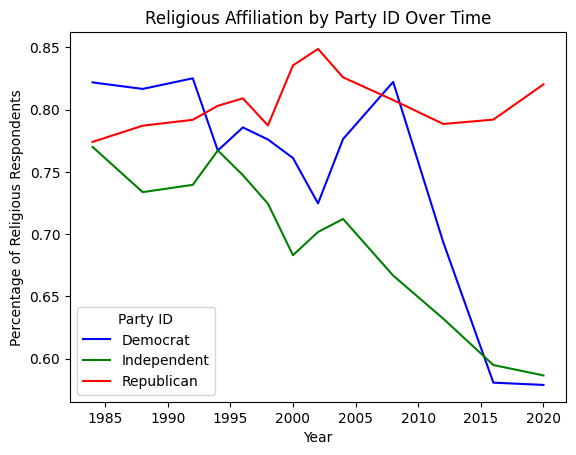

In [78]:
# Now I want to make a graph looking at party id over time, only considering dems, republicans, and independents
# Line graph (x = year, y = average percentage of religious people)
# 3 lines (democrats, republicans, independents)

df6 = df.groupby(['year', 'party_id_cat'])['religion'].mean().reset_index()
df6.head()

colors = {'Religious': '#008000', 'Non-Religious': '#0000FF'}

# Filter for only democrats, republicans, and independents

df6 = df6[(df6['party_id_cat'] == 'Republican') | (df6['party_id_cat'] == 'Democrat') | (df6['party_id_cat'] == 'Independent')]

df6.head()

# Define the colors for each category
colors = {'Republican': 'red', 'Independent': 'green', 'Democrat': 'blue'}

sns.lineplot(x='year', y='religion', hue='party_id_cat', data=df6, palette=colors)

# Add titles and labels
plt.title('Religious Affiliation by Party ID Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Religious Respondents') 

# Create the new legend
plt.legend(title = 'Party ID')

# Display the plot
plt.show()
